*Propose and define the primary success metric of the redesigned app*

First off, It's crucial to point out how a  **Goals&Actions&Evaluations&Metrics** framework can concisely guide us for ensuring direction of the purpose.Our **goals** are  that *our users will have the possibility to have more interaction and build their own shopping experience* and *increase the user's engagement and revenue due to more app sessions, incrcement of global navegation inside the app and centralize all business concern at the same place* .This requires a set of **actions** like..... Furthermore, it helps out to understand which channel and how the users will interact with our product.Finally, we need assess and track



Let's pretend a experiment.
Primary Metric determines whether or not our **Goal** suceed or fail. Let's take a look at following hypothesis testing. Although failing to find strong evidence for the alternative hypothesis is not equivalent to accepting
the null hypothesis.

**Null Hypothesis:** The new section in Rappi app doesn't allow the users have more intaraction with coupons and discounts.
**Alternative Hypothesis:** The new section in Rappi do allow the user have more interaction and build their own shopping experiences.

Therefore:

**User Goal:** The users will have the possibility to have more interaction and build their own shopping experience through this new section.
**Business Goals:**
    - Improvement of  App sessions rate because coupons now redeem inside the Rappi App.
    - Global navigation engagement because now users must check coupons and discount within App new section. 
    - Revenue can be measure from increasing of Global navigation.
 
**Action:** dasdasd



*How would you balance the need to deliver quick results, with statistical rigor, and while still monitoring for risks?*
- Regarding the balance between quick result versus hold statistical correctness is suited to set 3 stages of the experiment.
**Stage One:** It corresponds to instance when the first metrics just start out to be collected. At this point, the goal is gather as much information as posible. Furthermore, it's suposed that metrics plan are aligned to business goals.
**Stage Two:** At the beggining of the the experiment we collected metrics that permit us to generate statistical inferences. To do so, general speaking there might 3 statistical rule to follow. 1)Independence observations or less 10% of the population. 2) sample size greater than 30 and 3) the Data hopefully not strong skewed.
**Third Stage:** At this point, whether we could compare our experiment parameters(XXXXXXXXX) against control samples like sms, email, push  parameters. 

*Explain how you would translate the results from the testing plan into a decision on
whether to launch the new design or roll it back.*

    - 

Metrics:
*coupons activated
*coupons activated against email,puhs, sms activation.
*pageviewing on new section in Rappi app and how many users have activated the coupons.
*Keeping the track of user that don't enter before due to they just used to see the sms or email a not the rappi App.

https://help.optimizely.com/Ideate_and_Hypothesize/Primary_and_secondary_metrics_and_monitoring_metrics
https://hackernoon.com/metrics-game-framework-5e3dce1be8ac

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from scipy import stats

In [93]:
orders =  pd.read_csv('orders.csv', parse_dates = ['created_at'])
print(orders.head(50))
print(orders.info())
#print(orders)

    order_id   store_id  to_user_distance  to_user_elevation  total_earning  \
0   14364873   30000009          2.478101         -72.719360           4200   
1   14370123   30000058          0.451711          37.754761           4200   
2   14368534  900003684          2.026072         207.191162           4000   
3   14370258  900014452          2.671432           1.722656           4400   
4   14369923  900014085          0.965496         117.429199           3450   
5   14367859  900004363          0.577156          -7.895874           5200   
6   14367634  900006875          2.558039           4.086182           4200   
7   14369615  900005637          1.145407         -33.873657           3200   
8   14368621  900007609          1.218742         132.342285           4200   
9   14367450  900004941          1.282540           0.792480           3200   
10  14367975  900004941          2.347440        -123.032349           3200   
11  14368062  900006873          1.157796          7

In [3]:
print(orders.describe())

           order_id      store_id  to_user_distance  to_user_elevation  \
count  1.469870e+05  1.469870e+05     146987.000000      146987.000000   
mean   1.507718e+07  7.580708e+08          1.501015          26.899130   
std    4.750119e+05  3.214280e+08          0.845776          84.907724   
min    1.421073e+07  3.000000e+07          0.000000        -598.296875   
25%    1.466969e+07  9.000045e+08          0.836511         -18.348755   
50%    1.509241e+07  9.000077e+08          1.390230          11.145264   
75%    1.547355e+07  9.000127e+08          2.029955          61.024353   
max    1.590252e+07  9.000173e+08          9.360177        1009.380005   

       total_earning          taken  
count  146987.000000  146987.000000  
mean     5358.641594       0.921218  
std      1779.800955       0.269400  
min         0.000000       0.000000  
25%      4200.000000       1.000000  
50%      5200.000000       1.000000  
75%      6300.000000       1.000000  
max    108200.000000       1.

In [4]:
#week of day
orders['weekday'] = orders['created_at'].dt.dayofweek
#hour of the day
orders['hour']=orders['created_at'].dt.hour
#creating weekday 
weekday = {0:"monday",1:"tuesday",2:"wednesday",3:"thursday",4:"friday",5:"saturday",6:"sunday"}

day = [] #empty array to save days of the week
for i in orders['weekday']:
    day.append(weekday[i])
    
orders['day'] = day #appending the array to 'day' variable in orders dataframe.
orders = orders.drop("created_at", axis=1) #dropping created_at variable.



In [5]:
orders =  orders[orders['to_user_distance'] > 0]#avoid zero distances
orders= orders[(np.abs(stats.zscore(orders['to_user_distance'])) < 3)] #removing outlier
orders= orders[(np.abs(stats.zscore(orders['to_user_elevation'])) < 3)] #removing outlier
orders= orders[(np.abs(stats.zscore(orders['total_earning'])) < 3)] #removing outlier
#calcuting  new variables
orders['earn/dist'] =  orders['total_earning']/orders['to_user_distance']
orders['slope'] = orders['to_user_elevation']/(orders['to_user_distance']*1000)
print(orders.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 143288 entries, 0 to 146986
Data columns (total 11 columns):
order_id             143288 non-null int64
store_id             143288 non-null int64
to_user_distance     143288 non-null float64
to_user_elevation    143288 non-null float64
total_earning        143288 non-null int64
taken                143288 non-null int64
weekday              143288 non-null int64
hour                 143288 non-null int64
day                  143288 non-null object
earn/dist            143288 non-null float64
slope                143288 non-null float64
dtypes: float64(4), int64(6), object(1)
memory usage: 13.1+ MB
None


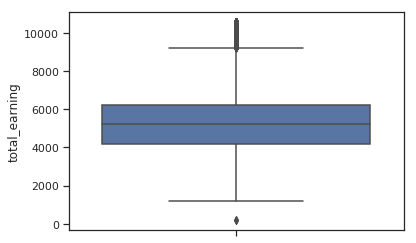

In [6]:
#let see total earning distribution
ax = sns.boxplot(y="total_earning", data=orders)



In [7]:
print(orders.describe())

           order_id      store_id  to_user_distance  to_user_elevation  \
count  1.432880e+05  1.432880e+05     143288.000000      143288.000000   
mean   1.507198e+07  7.595008e+08          1.470672          24.636214   
std    4.755452e+05  3.201184e+08          0.816348          79.196991   
min    1.421073e+07  3.000000e+07          0.002456        -227.252930   
25%    1.466262e+07  9.000045e+08          0.824285         -18.350677   
50%    1.508186e+07  9.000077e+08          1.367668          10.639709   
75%    1.546993e+07  9.000127e+08          1.990965          58.822266   
max    1.590252e+07  9.000173e+08          4.035917         281.268921   

       total_earning          taken        weekday           hour  \
count  143288.000000  143288.000000  143288.000000  143288.000000   
mean     5252.327571       0.922227       3.367909      15.769541   
std      1558.034611       0.267816       2.029495       3.791691   
min       200.000000       0.000000       0.000000       

Seem to be outlier because surely they must be above of 1.5 * median.
let's get rid of them.

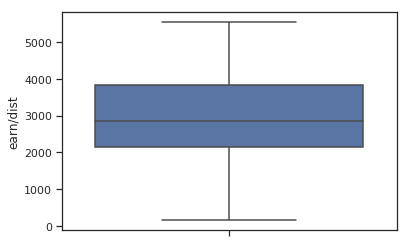

In [8]:
#let see total earning distribution
orders= orders[np.median(orders['earn/dist'])*1.5> orders['earn/dist']]#1.5 times the median is a outlier
orders= orders[np.median(orders['slope'])*1.5> orders['slope']]#1.5 times the median is a outlier
ax = sns.boxplot(y="earn/dist", data=orders)

          order_id
count   819.000000
mean     68.290598
std     132.382322
min       1.000000
25%       8.000000
50%      24.000000
75%      68.000000
max    1147.000000


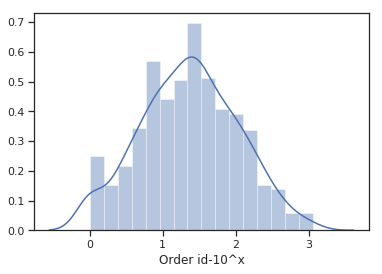

In [9]:
#creating a 
count_by_store = orders[["store_id","order_id"]].groupby("store_id").count()
#categories
print(count_by_store.describe())
hist= sns.distplot(np.log10(count_by_store['order_id']), axlabel = 'Order id-10^x')

The merchant where the order is purchased might impact how and why a courier can take the order. There might some benefit derived from being partner around one merchant or other. Thereby, let's use stored_id quartiles (25%,50% 75% and 100%) to generate a categorical variable around the number of orders placed in each store_id. The objetive is see whether or not purchasing in a specific store can foster to take or not the order.

In [10]:
#Where A is an excellent merchant partner and D a common partner. Furthermore, the Thresholds come 
#from  the quartiles above
store_score = []
for i in count_by_store['order_id']:
    if i > 124:
        store_score.append('A')
    elif i > 42:
        store_score.append('B')
    elif i > 15:
        store_score.append('C')
    else:
        store_score.append('D')


count_by_store['store_score'] = store_score
print(count_by_store.tail(10))




           order_id store_score
store_id                       
900016956         1           D
900016958         3           D
900016974        11           D
900016982         1           D
900016996         6           D
900017032         8           D
900017107         3           D
900017241         2           D
900017244         7           D
900017291         2           D


In [11]:
#merge with store_id as primary key in orders and store_id in count_by_store. Left join.
orders_score = pd.merge(left=orders, right=count_by_store, left_on='store_id', right_on='store_id',how='left')#merge orders to count_by_count
print(orders_score.head())

   order_id_x   store_id  to_user_distance  to_user_elevation  total_earning  \
0    14364873   30000009          2.478101         -72.719360           4200   
1    14370258  900014452          2.671432           1.722656           4400   
2    14367634  900006875          2.558039           4.086182           4200   
3    14369615  900005637          1.145407         -33.873657           3200   
4    14367450  900004941          1.282540           0.792480           3200   

   taken  weekday  hour       day    earn/dist     slope  order_id_y  \
0      0        3    20  thursday  1694.846396 -0.029345         189   
1      1        3    20  thursday  1647.056884  0.000645         479   
2      0        3    20  thursday  1641.882623  0.001597         100   
3      1        3    20  thursday  2793.766835 -0.029573         521   
4      0        3    19  thursday  2495.048885  0.000618         565   

  store_score  
0           A  
1           A  
2           B  
3           A  
4     

In [12]:
#some selection and  datatype changes
orders_selected = orders_score[["taken","order_id_x","store_id","to_user_distance",\
                          "total_earning","hour","day",\
                                "earn/dist",
                                "slope","store_score"]]
orders_selected['hour'] = orders_selected['hour'].astype(object)
#orders_selected['taken'] = orders_selected['taken'].astype(object)
#orders_selected.fillna(orders_selected.mean(), inplace=True)


/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The vehicles which were used to carry out the orders is unknown.Thereby it is misleading to say that all couriers in the sample simply have the same willigness to take a order. Perhaps, how much time does it take to deliver a order might help out to classify the vehicles used in each case.

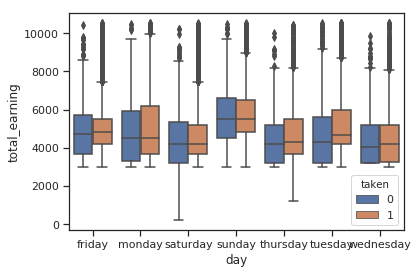

In [13]:

gx = sns.boxplot(x="day", y="total_earning",hue="taken",data=orders_selected.sort_values('day'))


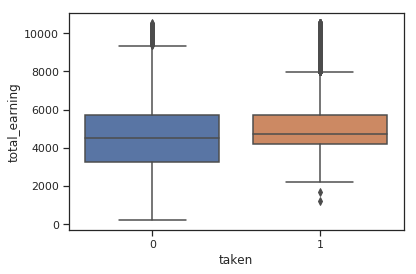

In [14]:
g = sns.boxplot("taken","total_earning", data = orders_selected)

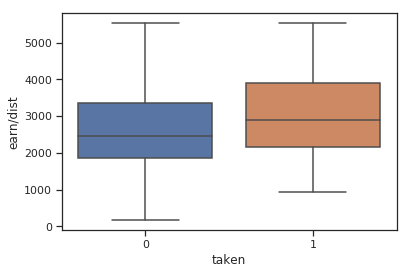

In [15]:
#gx = sns.catplot(x=orders_selected["taken"], y=orders_selected["earn/dist"])
g = sns.boxplot(x="taken", y="earn/dist", data=orders_selected)

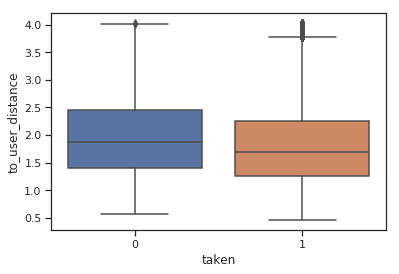

In [16]:
g = sns.boxplot(x=orders_selected["taken"], y=orders_selected["to_user_distance"])
#g = sns.boxplot(x="taken", y="to_user_distance", data=orders_selected)

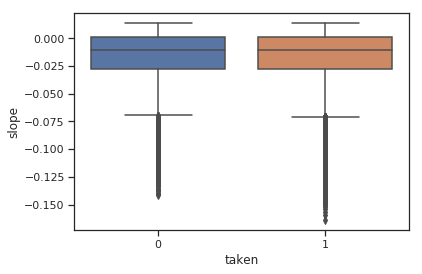

In [17]:
g = sns.boxplot(x="taken", y="slope", data=orders_selected)

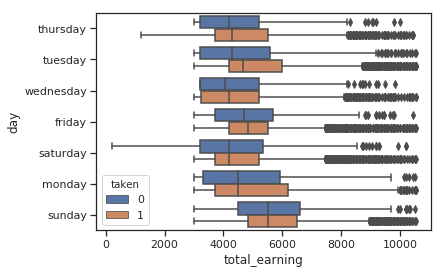

In [18]:

g = sns.boxplot(y="day", x="total_earning",hue='taken',orient = 'h', data=orders_selected)

In [19]:
rs_orders = orders_selected.sample(n=1000, random_state=1575)
print(rs_orders)

       taken  order_id_x   store_id  to_user_distance  total_earning hour  \
31653      1    14664304   30000258          1.932393           8200   20   
9349       1    14980343  900007756          1.279182           4500   14   
36019      1    14313927  900011227          1.998561           5200   22   
27445      1    14691145  900005727          1.460263           4200   15   
55261      1    14348155  900003685          1.037386           3200   18   
40057      0    15790177   30000308          2.017794           4200   18   
52210      1    15881724  900013195          0.717819           3700   17   
28033      1    14467515   30000301          1.178766           3200   13   
37575      0    15092044  900010570          1.452540           3200   19   
54853      1    14440093  900015225          2.232322           4500   20   
37433      1    15611844  900005373          2.332016           7250   21   
14752      1    14828940  900008777          2.067265           5500    9   

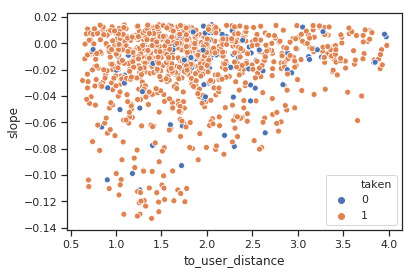

In [20]:
g = sns.scatterplot(x="to_user_distance", y="slope",hue = 'taken', data=rs_orders)

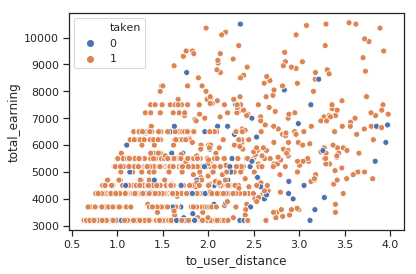

In [21]:
g = sns.scatterplot(x = rs_orders["to_user_distance"], y = rs_orders["total_earning"],\
                hue = rs_orders['taken'])
#g = sns.scatterplot(x="to_user_distance", y="total_earning",hue ='taken' ,data=orders_selected)


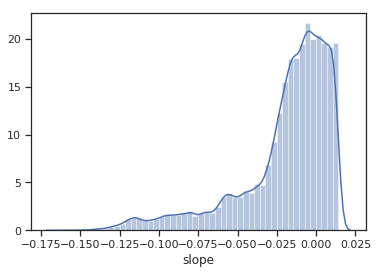

In [22]:
hist= sns.distplot((orders_selected['slope']))

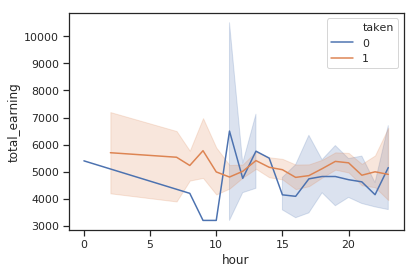

In [23]:
ax = sns.lineplot(x="hour", y="total_earning",hue="taken" ,data=rs_orders)

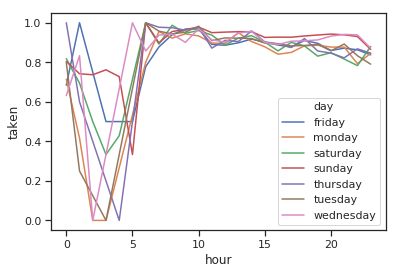

In [24]:
data = orders_selected[['day','hour','taken']]
df_count_taken = data.groupby(['day','hour'], as_index=False).agg({"taken": "mean"})
ad = sns.lineplot(x="hour", y="taken",hue="day",err_style = None,data=df_count_taken)

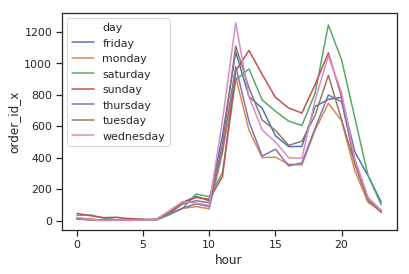

In [25]:
df_count_order = orders_selected.groupby(['hour','day'], as_index=False).agg({"order_id_x": "count"})
ad = sns.lineplot(x="hour", y="order_id_x",hue ='day',err_style = None,data=df_count_order)

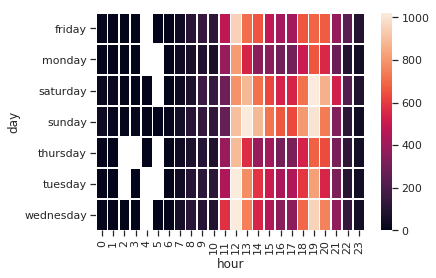

In [26]:

#print(data)
pivot = data.groupby(['day','hour'], as_index=False).agg({"taken": "sum"})

pivot = pivot.pivot('day','hour','taken')

ax = sns.heatmap(pivot,linewidths=.5, robust = True)


In [27]:
momento =[]
for i in orders_selected['hour']:
    if i >= 0 and i < 5:
         momento.append('madrugada')
    else:
        momento.append('restodia')

orders_selected['momento'] = momento
print(orders_selected)

       taken  order_id_x   store_id  to_user_distance  total_earning hour  \
0          0    14364873   30000009          2.478101           4200   20   
1          1    14370258  900014452          2.671432           4400   20   
2          0    14367634  900006875          2.558039           4200   20   
3          1    14369615  900005637          1.145407           3200   20   
4          0    14367450  900004941          1.282540           3200   19   
5          0    14367975  900004941          2.347440           3200   19   
6          1    14369442  900009486          2.258879           4200   20   
7          0    14368247  900005637          1.083265           3200   20   
8          1    14369738   30000301          1.881029           3200   20   
9          1    14370660  900006491          0.600652           3200   20   
10         1    14367873  900011220          1.113147           5200   20   
11         1    14364215  900002160          1.250698           5400   20   

/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
print(orders_selected.head())

   taken  order_id_x   store_id  to_user_distance  total_earning hour  \
0      0    14364873   30000009          2.478101           4200   20   
1      1    14370258  900014452          2.671432           4400   20   
2      0    14367634  900006875          2.558039           4200   20   
3      1    14369615  900005637          1.145407           3200   20   
4      0    14367450  900004941          1.282540           3200   19   

        day    earn/dist     slope store_score   momento  
0  thursday  1694.846396 -0.029345           A  restodia  
1  thursday  1647.056884  0.000645           A  restodia  
2  thursday  1641.882623  0.001597           B  restodia  
3  thursday  2793.766835 -0.029573           A  restodia  
4  thursday  2495.048885  0.000618           A  restodia  


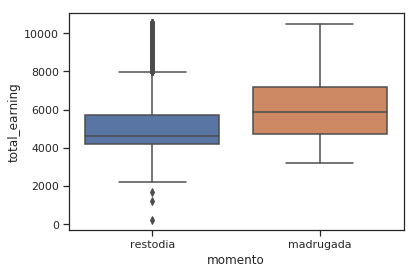

In [29]:
g = sns.boxplot(x="momento", y="total_earning", data=orders_selected)

In [30]:
#Import models, including VotingClassifier Meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [31]:
rs_orders['taken'] = rs_orders['taken'].astype(object)
for column in rs_orders.columns:
    if rs_orders[column].dtype == type(object):
        le = LabelEncoder()
        rs_orders[column] = le.fit_transform(rs_orders[column])
#print(orders_selected[['day']].head())
#orders_selected= pd.DataFrame(orders_selected).fillna(0)


In [32]:
y = rs_orders.iloc[:,0]
X =rs_orders.iloc[:,3:]
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

In [33]:
dt = DecisionTreeClassifier(max_depth = 3,min_samples_leaf=0.16, random_state = 1, criterion ='gini')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Test set accuracy: {}".format(acc))

Test set accuracy: 0.9033333333333333


In [34]:
SEED = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
#Instantiate Individual classifiers
lr =  LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(max_depth = 3,min_samples_leaf=0.12,random_state=SEED)
 #define a list clalled classfier that contains the tuples (classifer_name, classifier)
classifiers = [('logisticR',lr),
               ('KNN', knn),
               ('CART', dt)]


In [35]:
vc =  VotingClassifier( classifiers )# Instantiate a Voting Classifier
#Fit cv to the training set and predict test set labels
vc. fit(X_train, y_train)
y_pred = vc.predict(X_test)
#evaluate the test-set accuracy of vc
print('Voting Classifier: {}'.format(accuracy_score(y_test,y_pred)))

/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Voting Classifier: 0.9366666666666666


In [36]:
import pickle
for name, model in classifiers:
    filename = '{}.sav'.format(name)
    fitted_model = model.fit(X_train,y_train)
    pickle.dump(fitted_model, open(filename, 'wb'))

/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
def standarize(df):
    """
    Esta funcion tiene como objetivo escalar y centralizar los inputs de la request
    """

    for column in df.columns:
        if df[column].dtype == type(object):
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
    return df_scaled


filename="logisticR"
file = '{}.sav'.format(filename)
loaded_model= pickle.load(open(file,'rb'))

order4 = pd.DataFrame({"to_user_distance":1.4,"total_earning":4500,"hour":4,"day":6,"earn/dist":3000,"slope":-0.21,"store_score":1}, index=[0])
#print(X_test)
prediction3333 = loaded_model.predict_proba(order4)
# prediction4444 = loaded_model.predict_proba(X_test)
print(prediction3333)
# pred_take =[i[1] for i in prediction4444] 
# pred_taken = pd.DataFrame({"pred":pred_take})
# #print(pred_taken)
# newDataFrame = pd.concat([X_test, pred_taken])
# print(newDataFrame)
# # print(standarize(X_test))

[[0.09950795 0.90049205]]


In [110]:
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    print('{}:{}'.format(clf_name, accuracy_score(y_test,y_pred).ravel()))  
    

logisticR:[0.93666667]
KNN:[0.91666667]
CART:[0.93666667]


/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
acc_cv = -cross_val_score(dt, X_train, y_train, cv = 10, n_jobs = -1)
dt.fit(X_train,y_train)
y_predict_train = dt.predict(X_train)
y_predict_test =  dt.predict(X_test)

# Compute the 10-folds CV RMSE
RMSE_CV = (acc_cv.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

print('CV MSE:{:.2f}'.format(mse_cv.mea()))
print('train MSE:{:.2f}'.format(MSE(y_train,y_predict_train)))
print('test MSE:{:.2f}'.format(MSE(y_train,y_predict_test)))

/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


CV RMSE: nan


NameError: name 'mse_cv' is not defined

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names = ['taken','not taken'], feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Instantiate rf
rf = RandomForestClassifier(n_estimators=30,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

 #Import mean_squared_error as MSE
#from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
acc_test = accuracy_score(y_test,y_pred)

# Print acc_test
print('Test set confusion matrix of rf: {}'.format(acc_test))

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()